# Lab - 5

Name: Purusharth Malik

Registration No.: 2348542

- Implement quantum gates  using teleportation
- Use the barrier function creates a visual separation
- Test that the protocol works correctly for different state vectors.
- Proof that Q was successfully teleported into B

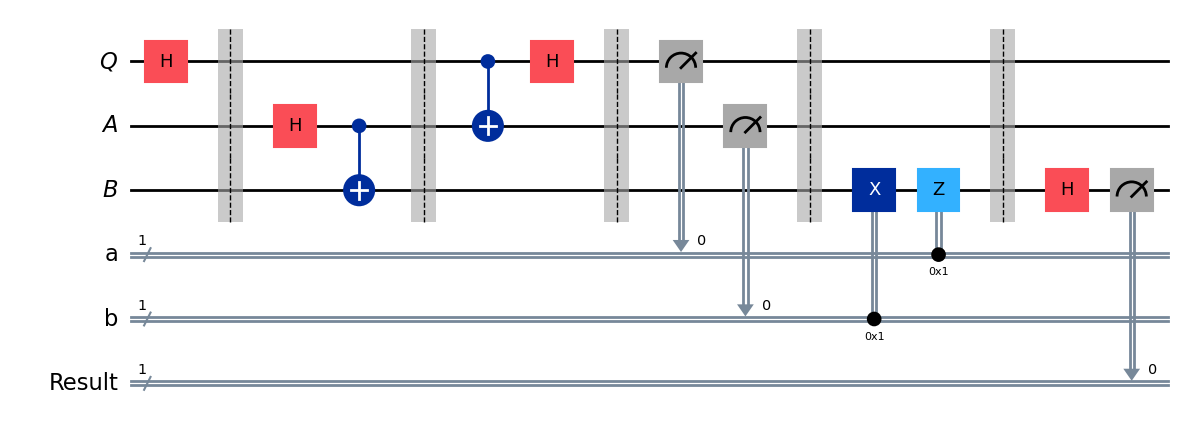

In [35]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

def teleportation_with_gate():
    Q = QuantumRegister(1, name='Q')
    A = QuantumRegister(1, name='A')
    B = QuantumRegister(1, name='B')
    
    a = ClassicalRegister(1, name='a') 
    b = ClassicalRegister(1, name='b')

    qc = QuantumCircuit(Q, A, B, a, b)
    
    # Prepare the state to teleport on Q
    qc.h(Q[0])
    qc.barrier()
    
    # Create entanglement between A and B
    qc.h(A[0])
    qc.cx(A[0], B[0])
    qc.barrier()
    
    # Bell-state measurement between Q and A
    qc.cx(Q[0], A[0])
    qc.h(Q[0])
    qc.barrier()
    qc.measure(Q[0], a[0])
    qc.measure(A[0], b[0])
    qc.barrier()
    
    # Apply classical corrections on B based on measurement outcomes
    qc.x(B[0]).c_if(b, 1)  # Apply X correction if A's measurement is 1
    qc.z(B[0]).c_if(a, 1)  # Apply Z correction if Q's measurement is 1
    qc.barrier()
    
    # Verification step: Reverse the teleportation
    qc.h(B[0])  # Applying Hadamard gate for verification
    
    result = ClassicalRegister(1, 'Result')
    qc.add_register(result)
    qc.measure(B, result)
    return qc

# Create the teleportation circuit
teleportation_circuit = teleportation_with_gate()

# Visualize the circuit
teleportation_circuit.draw('mpl')


Measurement Results: {'0 1 0': 245, '0 0 0': 255, '0 1 1': 244, '0 0 1': 280}


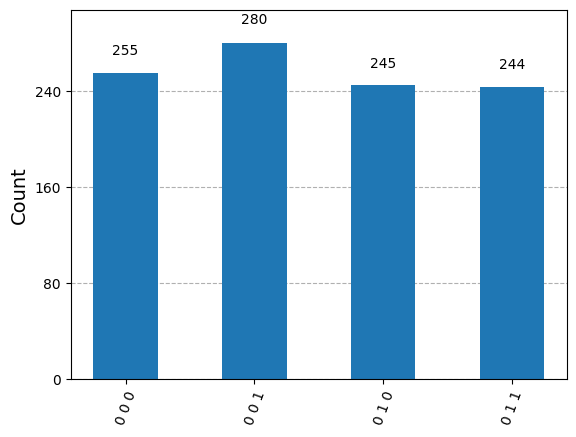

In [36]:
simulator = AerSimulator()
compiled_circuit = transpile(teleportation_circuit, simulator)
result = simulator.run(compiled_circuit).result()

counts = result.get_counts()
print("\nMeasurement Results:", counts)

plot_histogram(counts)

# End